### WAY TO DISCRETE WAVE NUMBER METHOD

In [ ]:
#https://qiita.com/sai-sui/items/9650ff14af54dd147a39

## PREPARE

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
#t=> x
def dft_(f):
    n = len(f)
    Y = []
    for x in range(n):
        y = 0j
        for t in range(n):
            a = 2 * np.pi * t * x / n
            y += f[t] * np.exp(-1j * a)
        Y.append(y)
    return Y

In [4]:
#x=>t
def idft_(Y):
    N = len(Y)
    f = []
    for t in range(N): # t は時間ドメインの各点を示します
        val = 0j # 加算の結果を格納する新しい変数を作成します
        for x in range(N): # x は周波数ドメインの各点を示します
            a = 2 * np.pi * x * t / N
            val += Y[x] * np.exp(1j * a) # val に値を加えます
        f.append(val/N)
    return f

In [5]:
t = np.linspace(0,100,200)
y = np.cos(t)

In [6]:
ran = np.array(range(len(y)))

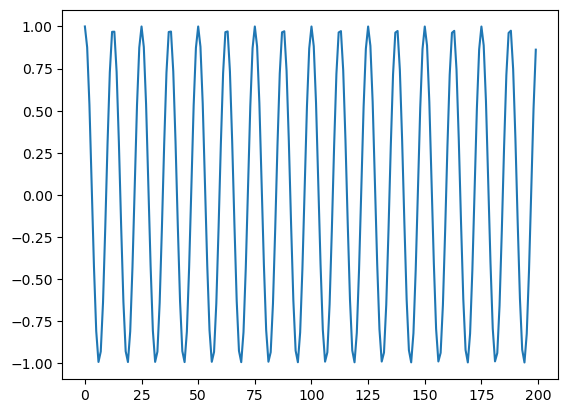

In [7]:
plt.plot(ran,y)

/Users/koei/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


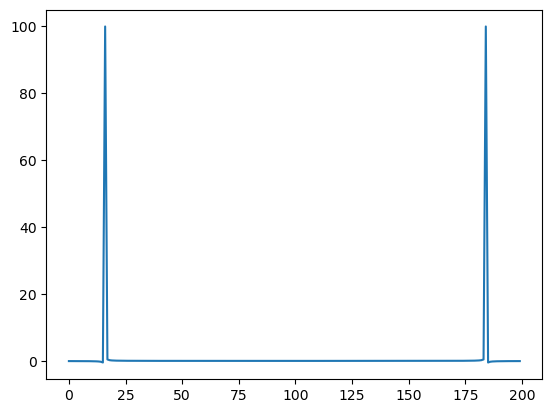

In [8]:
plt.plot(ran, dft_(y))

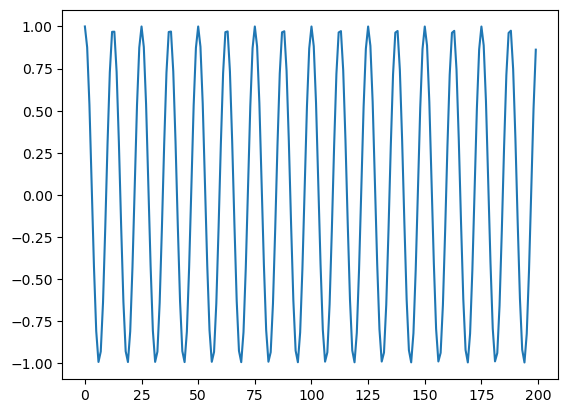

In [9]:
f = dft_(y)
plt.plot(ran, idft_(f))

## DISCRETE WAVE NUMBER METHOD

In [ ]:
#https://ja.wikipedia.org/wiki/%E9%9B%A2%E6%95%A3%E3%83%95%E3%83%BC%E3%83%AA%E3%82%A8%E5%A4%89%E6%8F%9B

In [468]:
omega_imag = (-1j * 2 * np.pi)

In [545]:
# the DFT with the phase shift
def dft_bouchon(f, omega_imag=-1j*2*np.pi):
    n = len(f)
    Y = []
    for x in range(n):
        y = 0j
        for t in range(n):
            y += f[t] * np.exp(-1j * (2 * np.pi * x + 2 * np.pi * omega_imag * x) * t/n)  #tがかかってはいけない
        Y.append(y)
    return Y

# the IDFT with the phase shift
def idft_bouchon(Y, omega_imag=-1j*2*np.pi):
    n = len(Y)
    f = []
    for t in range(n):
        x = 0j
        for k in range(n):
            x += Y[k] * np.exp(1j * (2 * np.pi * k + 2 * np.pi * omega_imag * k)*t / n)
        f.append(x / n)
    return f

In [546]:
t = np.arange(0, 2*np.pi, 0.01)
f = np.cos(t)

In [547]:
# Perform the DFT again
Y = dft_bouchon(f)

# Perform the IDFT again
f_reconstructed = idft_bouchon(Y)

/var/folders/58/_f3bywg95116dv_3jb9q54840000gn/T/ipykernel_16306/215033849.py:19: RuntimeWarning: overflow encountered in cdouble_scalars
  x += Y[k] * np.exp(1j * (2 * np.pi * k + 2 * np.pi * omega_imag *k)*t / n)
/var/folders/58/_f3bywg95116dv_3jb9q54840000gn/T/ipykernel_16306/215033849.py:20: RuntimeWarning: invalid value encountered in cdouble_scalars
  f.append(x / n)
/var/folders/58/_f3bywg95116dv_3jb9q54840000gn/T/ipykernel_16306/215033849.py:19: RuntimeWarning: overflow encountered in exp
  x += Y[k] * np.exp(1j * (2 * np.pi * k + 2 * np.pi * omega_imag *k)*t / n)
/var/folders/58/_f3bywg95116dv_3jb9q54840000gn/T/ipykernel_16306/215033849.py:19: RuntimeWarning: invalid value encountered in cdouble_scalars
  x += Y[k] * np.exp(1j * (2 * np.pi * k + 2 * np.pi * omega_imag *k)*t / n)


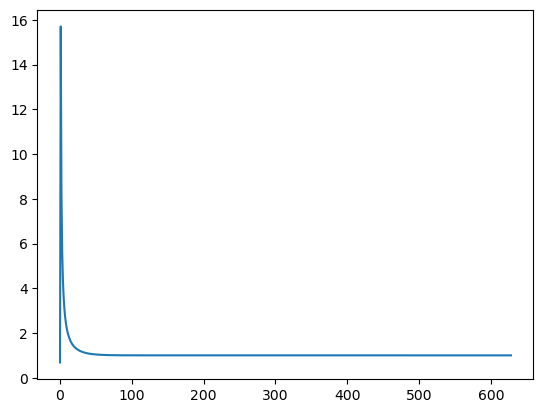

In [548]:
plt.plot(range(len(f)), Y)

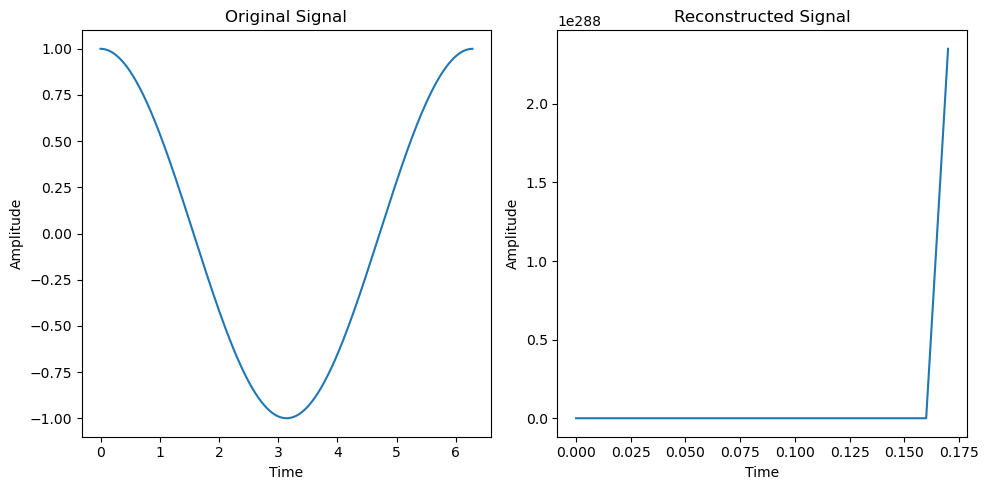

In [549]:
# Plot the original and reconstructed signals again
plt.figure(figsize=(10, 5))

# Plot the original signal
plt.subplot(1, 2, 1)
plt.plot(t, f)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(1, 2, 2)
plt.plot(t, np.real(f_reconstructed))
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [550]:
omegas = np.linspace(-100,100,1000)
omegas = np.array(omegas) + omega_imag

def n_y(omegas):
    y = []
    for omega in omegas:
        y.append(np.sign(omega))
    return y


Y = dft_bouchon(n_y(omegas))

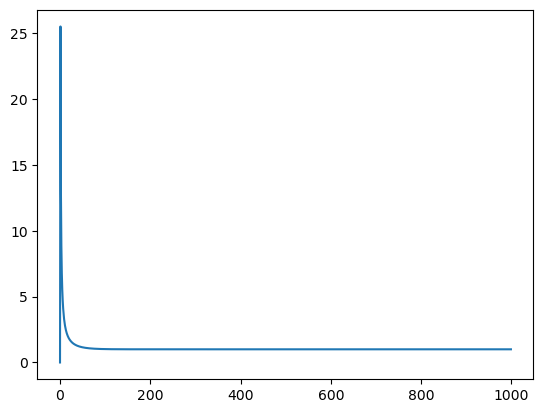

In [551]:
plt.plot(range(len(omegas)), np.abs(Y))

In [552]:
t = np.arange(0, 5*np.pi, 0.01)
f = np.cos(t)

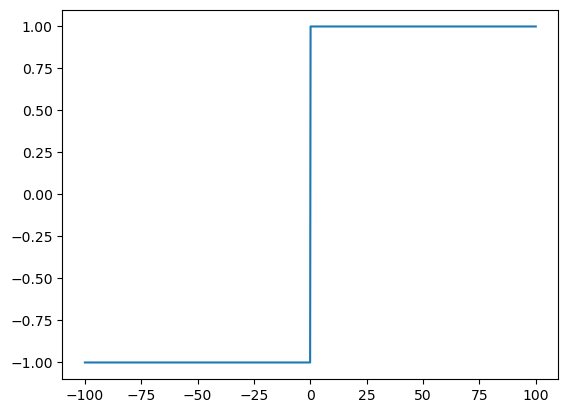

In [553]:
plt.plot(omegas, n_y(omegas))

/var/folders/58/_f3bywg95116dv_3jb9q54840000gn/T/ipykernel_16306/215033849.py:19: RuntimeWarning: overflow encountered in cdouble_scalars
  x += Y[k] * np.exp(1j * (2 * np.pi * k + 2 * np.pi * omega_imag *k)*t / n)
/var/folders/58/_f3bywg95116dv_3jb9q54840000gn/T/ipykernel_16306/215033849.py:19: RuntimeWarning: overflow encountered in exp
  x += Y[k] * np.exp(1j * (2 * np.pi * k + 2 * np.pi * omega_imag *k)*t / n)
/var/folders/58/_f3bywg95116dv_3jb9q54840000gn/T/ipykernel_16306/215033849.py:20: RuntimeWarning: invalid value encountered in cdouble_scalars
  f.append(x / n)
/var/folders/58/_f3bywg95116dv_3jb9q54840000gn/T/ipykernel_16306/215033849.py:19: RuntimeWarning: invalid value encountered in cdouble_scalars
  x += Y[k] * np.exp(1j * (2 * np.pi * k + 2 * np.pi * omega_imag *k)*t / n)


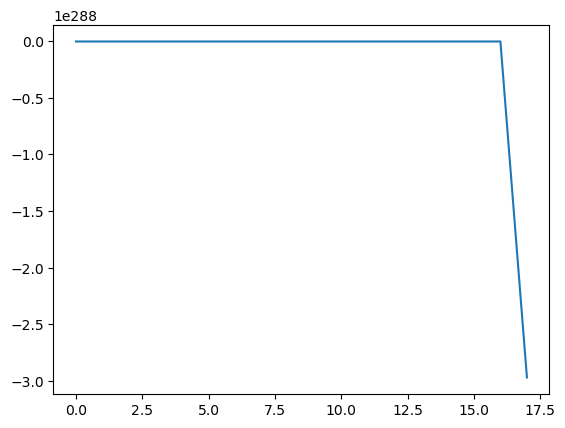

In [554]:
plt.plot(range(len(omegas)),idft_bouchon(Y) )